### importing requird tools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from IPython.display import Image

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
train_csv = pd.read_csv("D:\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train.csv")

train_csv.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [5]:
len(train_csv)



21397

In [6]:
import json

with open("D:\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/label_num_to_disease_map.json") as fp:
     disease_names = json.load(fp=fp)

disease_names

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [7]:
# With this dictionary we can make list of only disease names
disease_names = [name for name in disease_names.values()]
disease_names

['Cassava Bacterial Blight (CBB)',
 'Cassava Brown Streak Disease (CBSD)',
 'Cassava Green Mottle (CGM)',
 'Cassava Mosaic Disease (CMD)',
 'Healthy']

In [10]:
!ls

Building_Own_CNN.ipynb
Cassava_leaf_disease_rough_notebook.ipynb
Data
EDA_and_Preprocessing.ipynb
Models
model_plot.png


In [11]:
# saving disease names for later use
import pickle 

with open('Data/disease_names.txt', 'wb') as fp:
    pickle.dump(disease_names, fp)

In [12]:
NUM_CLASSES=5

### Get paths of all images from id

In [13]:
filenames= ["D:\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train_images/"+fname for fname in train_csv.image_id]
filenames[:5]


['D:\\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train_images/1000015157.jpg',
 'D:\\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train_images/1000201771.jpg',
 'D:\\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train_images/100042118.jpg',
 'D:\\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train_images/1000723321.jpg',
 'D:\\Machine_learning/Convolutional_Neural_Network/Cassava_leaf_disease_classification/Data/train_images/1000812911.jpg']

In [14]:
train_labels = [label for label in train_csv.label]
train_labels[:5]

[0, 3, 1, 1, 3]

In [15]:
check_label_count = []
for i in range(5):
   check_label_count.append(train_labels.count(i))

check_label_count

[1087, 2189, 2386, 13158, 2577]

<AxesSubplot:ylabel='count'>

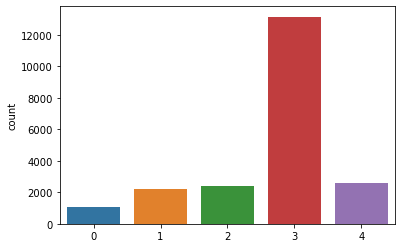

In [10]:
sns.countplot(x=train_labels)

### Now one hot encode this using keras utils

In [16]:
y=to_categorical(train_labels)
y

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
# We already have y now setting X 
X=filenames

#### Lets see image from path

In [18]:
len(X)

21397

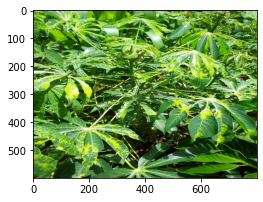

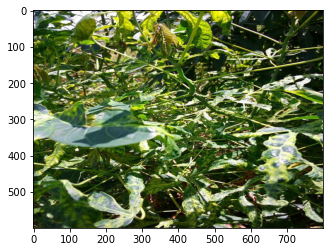

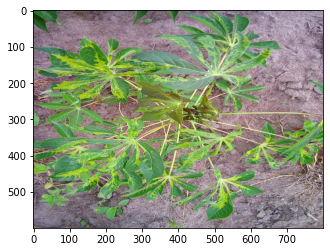

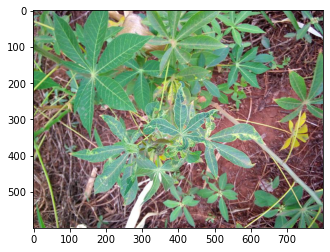

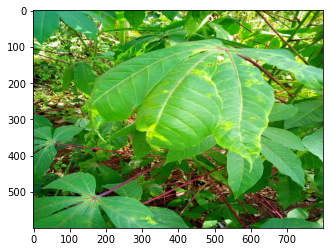

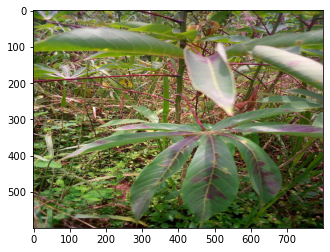

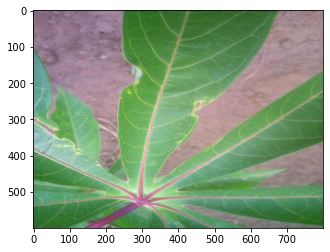

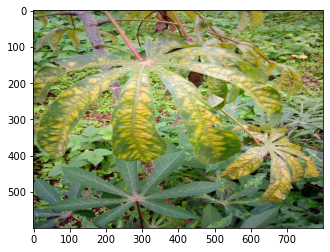

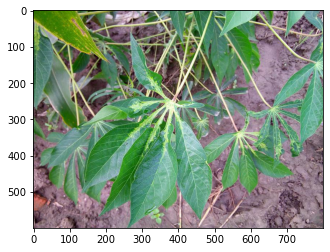

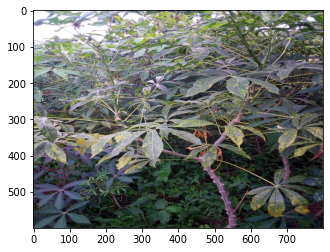

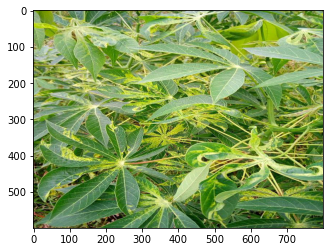

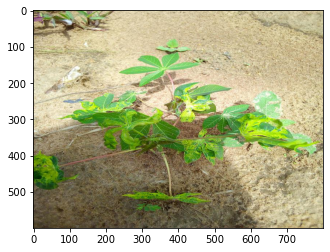

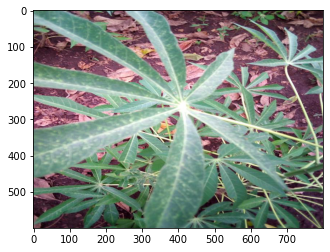

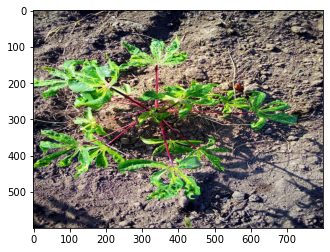

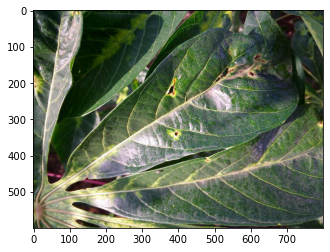

In [14]:
plt.figure(figsize=(4,4))
for i in np.random.randint(20000,size=15): 
    imgs=plt.imread(X[i+1])
    plt.imshow(imgs)
    plt.show()
  

### Now we have labels and images split them
>* for experimentation we will take half images 10000

In [19]:
NUM_IMG = 10000 
NUM_IMG

10000

### Split them in train and validation set

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMG],y[:NUM_IMG],test_size=0.2,random_state=0)

In [21]:
len(X_train), len(X_val), len(y_train), len(y_val)

(8000, 2000, 8000, 2000)

## Now we have images path and labels 
* lets make fuction to process images from given path
>* takes input as img path
>* reads image from path 
>* turn jpeg to tensor
>* rescals image from 0-255 to 0-1 
>* resize image to (224,224)
>* returns image

In [22]:
# declare image size
IMG_SIZE=224

def process_image(img_path, img_size=IMG_SIZE):
      '''
      Takes image path as input 
      Returns processed image in form of tensor with size(IMG_SIZE,IMG_SIZE)
      '''
      # Read image from path 
      image = tf.io.read_file(img_path)

      # turn image into tensor
      image = tf.image.decode_jpeg(image,channels=3)

      # Converts colors channels from 0-255 to 0-1
      image = tf.image.convert_image_dtype(image,tf.float32)

      # resize image
      image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

      return image


### Now above function will just convert image but we want tuple of  converted image and its label

In [23]:
def get_tuple_imlabel(img_path,label):
   '''
   takes image path as input prepeocess the images and
   returns tuple of image and label
   '''
   imgs = process_image(img_path)
   return imgs, label
   

### Check our function

In [24]:
get_tuple_imlabel(X[10],y[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.53378356, 0.5533914 , 0.43574435],
         [0.5309624 , 0.55057025, 0.4329232 ],
         [0.54599845, 0.5656063 , 0.4479592 ],
         ...,
         [0.44534814, 0.6247997 , 0.42544004],
         [0.41623673, 0.5909864 , 0.4007203 ],
         [0.41714695, 0.58985597, 0.4085335 ]],
 
        [[0.5257803 , 0.5494498 , 0.42977193],
         [0.52056825, 0.54423773, 0.42455986],
         [0.52055824, 0.5442277 , 0.42454985],
         ...,
         [0.46382576, 0.6349041 , 0.34661883],
         [0.47507998, 0.6445375 , 0.3536412 ],
         [0.47491   , 0.64519805, 0.35430166]],
 
        [[0.5622049 , 0.5896559 , 0.46808726],
         [0.5261205 , 0.55357146, 0.43200284],
         [0.5401261 , 0.56757706, 0.44600844],
         ...,
         [0.64427775, 0.80665255, 0.45231083],
         [0.5815035 , 0.74297774, 0.37776196],
         [0.5202281 , 0.6833833 , 0.31132445]],
 
        ...,
 
        [[0.27712047, 0.48221278

### Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

Use Dataset.map to create a dataset of image, label pairs:[from tenserfow documentation](https://www.tensorflow.org/tutorials/load_data/images)

### To Know more about tensor_slices visit [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)

In [25]:
# Declare batch size 
BATCH_SIZE = 32

def create_batch(X,y=None,batch_size=BATCH_SIZE,validation_data=False,test_data=False):
        '''
        takes X, and y(if any) as input and creates data baches of pair image(X),label(y)
        only shffles data if it is training 
        set valid_data=True if you are passing validation set
        Also accepts data  with no labels ie. test data and set test_data=True
        '''
        # for test images we don't have labels so call process_image function diretcly
        if test_data:
                print("creating test data batches......")
                # Turn filepaths and labels into Tensors
                data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
                data_batch = data.map(process_image).batch(batch_size)
                #return data batch
                return data_batch

        # val data have labels so we have map get_tuple_imlabel function
        elif validation_data:
              print("creating validation data batches......")
              data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) 
              #map func                                            
              data_batch = data.map(get_tuple_imlabel).batch(batch_size)
              return data_batch

        # For train set only diff is we have to shuffle it
        else:
              print("creating training data batches......")
              data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

              ## Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
              data = data.shuffle(buffer_size=len(X))

              # Now map function
              data_batch = data.map(get_tuple_imlabel).batch(batch_size)
              return data_batch


In [26]:
train_data = create_batch(X_train,y_train)
val_data = create_batch(X_val,y_val,validation_data=True)

creating training data batches......
creating validation data batches......


In [27]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))

In [28]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

In [29]:
len(train_data),len(val_data)

(250, 63)

In [34]:
# Create a function for viewing images in a data batch
def show_images(images,labels):
  """
  Displays images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(30):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(6, 6, i+1)
    # Display an image
    plt.imshow(images[i])
    # title label 
    plt.title(labels[i].argmax())
    # get rid of axis numbers
    plt.axis('off')

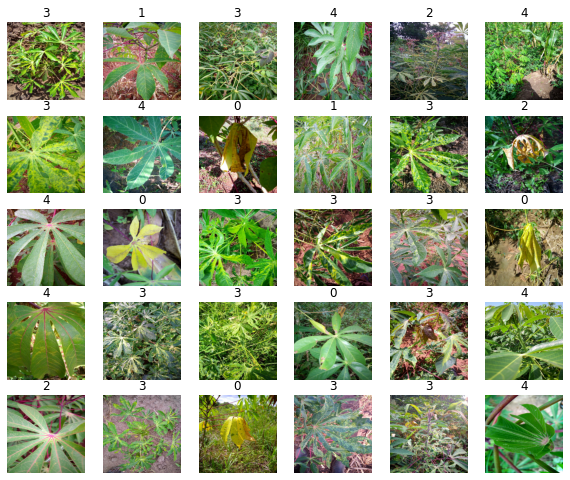

In [35]:
# Our images and labels are in batch to iterate through it use next()
train_images, train_labels = next(train_data.as_numpy_iterator())

show_images(train_images,train_labels)

In [28]:
!ls

Building_Own_CNN.ipynb
Cassava_leaf_disease_rough_notebook.ipynb
Data
EDA_and_Preprocessing.ipynb


In [44]:
train_data.element_spec

In [46]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))

## Save preprocesses data as dummy data beause its only half data we will experiment on it
>* to see process of saving data visit [here](https://www.tensorflow.org/api_docs/python/tf/data/experimental/save) and for loading [here](https://www.tensorflow.org/api_docs/python/tf/data/experimental/load)

In [28]:
tf.data.experimental.save(train_data,'data/dummy_train_data')

In [29]:
tf.data.experimental.save(val_data,'data/dummy_val_data')

### Now preprocesses all data and save it 

In [47]:
len(X), len(y)

(21397, 21397)

In [48]:
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X,y,random_state=0, test_size=0.2)

In [49]:
train_full_data = create_batch(X_train_full,y_train_full)
val_full_data = create_batch( X_val_full, y_val_full,validation_data=True)

creating training data batches......
creating validation data batches......


In [50]:
train_full_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))

In [51]:
val_full_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))

In [36]:
tf.data.experimental.save(train_full_data, 'data/preprocessed_data/train_full_data')

In [37]:
tf.data.experimental.save(val_full_data, 'data/preprocessed_data/val_full_data')

### NOW WE CAN LOAD THIS PROCESSED DATA AND TRAIN DIFFRENT MODELS 
>* when loading we need elemect spec as it is 